In [2]:
#libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [3]:
#Load the csv file

data = pd.read_csv("der_training_data-15600-elements.csv")
#data["index"] = pd.to_datetime(data["index"])

#Extract the input features (X) and the target outputs (y)
X = data.iloc[:,3:9].values
y = data.iloc[:,1:3].values


#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Normalize the data 
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [14]:
#Creating the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1500, activation="relu", input_shape =(6,)),
    tf.keras.layers.Dense(2000, activation="relu"),
    tf.keras.layers.Dense(2000, activation="relu"),
    tf.keras.layers.Dense(2000, activation="relu"),
    tf.keras.layers.Dense(1500, activation="relu"),
    tf.keras.layers.Dense(2) #2 outputs
])

#create optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
#Compile model
model.compile(optimizer=opt, loss="mean_squared_error", metrics = ["mean_absolute_error"])


In [15]:
#Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Predict on the test data
y_pred = model.predict(X_test)

Epoch 1/100
195/195 [==============================] - 35s 175ms/step - loss: 409454144.0000 - mean_absolute_error: 12310.7266
Epoch 2/100
195/195 [==============================] - 36s 184ms/step - loss: 30839900.0000 - mean_absolute_error: 3199.3687
Epoch 3/100
195/195 [==============================] - 36s 183ms/step - loss: 3941036.2500 - mean_absolute_error: 978.8391
Epoch 4/100
195/195 [==============================] - 36s 184ms/step - loss: 1154868.3750 - mean_absolute_error: 510.9229
Epoch 5/100
195/195 [==============================] - 37s 188ms/step - loss: 624335.8125 - mean_absolute_error: 395.8574
Epoch 6/100
195/195 [==============================] - 36s 183ms/step - loss: 485885.0000 - mean_absolute_error: 365.9007
Epoch 7/100
195/195 [==============================] - 36s 184ms/step - loss: 439894.4062 - mean_absolute_error: 355.4753
Epoch 8/100
195/195 [==============================] - 35s 178ms/step - loss: 422111.1875 - mean_absolute_error: 350.2660
Epoch 9/100
19

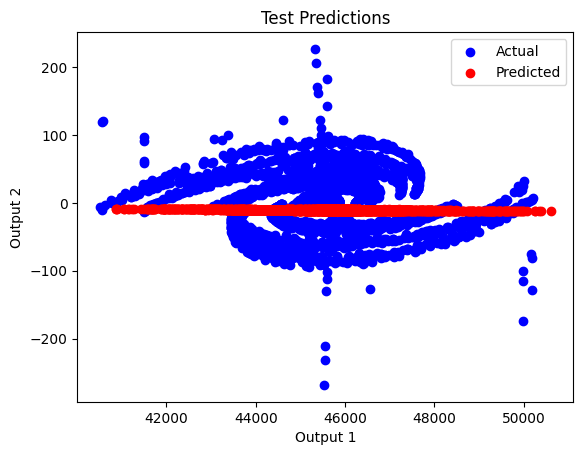

In [16]:
# Plot the predictions 

plt.scatter(y_test[:, 0], y_test[:, 1], color="b", label="Actual")
plt.scatter(y_pred[:, 0], y_pred[:, 1], color="r", label="Predicted")
plt.xlabel("Output 1")
plt.ylabel("Output 2")
plt.title("Test Predictions")
plt.legend()
plt.show()

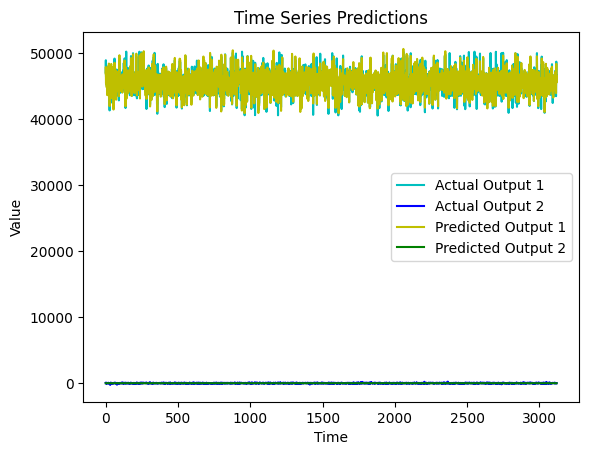

In [17]:
# Plot for time series data
indx = range(3120) #20% of the index of the csv file
plt.plot(indx, y_test[:, 0], color='c', label="Actual Output 1")
plt.plot(indx, y_test[:, 1], color='b', label="Actual Output 2")
plt.plot(indx, y_pred[:, 0], color='y', label="Predicted Output 1")
plt.plot(indx, y_pred[:, 1], color='g', label="Predicted Output 2")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Time Series Predictions")
plt.legend()
plt.show()